In [23]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
# from time import sleep
from world import World
from agent_simple_random import Agent_simple_random 
from agent_hemilton_cycle import Agent_hemilton_cycle
from managers import Manager_simple, Breeder
from genetic import Agent_genetic_3
import ipywidgets as widgets
from ipywidgets import interactive
%matplotlib inline
import copy
import pickle

In [2]:
# %matplotlib tk
# plt.ion()

In [3]:
# agent = Agent_hemilton_cycle()
agent = Agent_simple_random()
w = World()
w.game(agent)
w 

w.replay()

interactive(children=(IntSlider(value=162, description='step', max=325), Output(layout=Layout(height='450px'))…

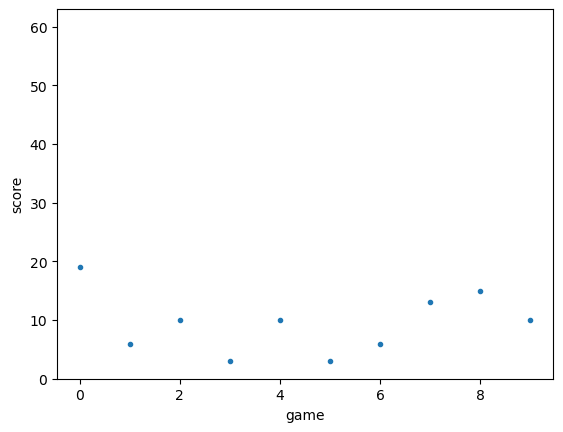

In [4]:
manager = Manager_simple(Agent_simple_random)

manager.play_games()
manager.plot()

# Genetic

In [16]:
br = Breeder(Agent_genetic_3, n_agents=50)
br.games_per_agent = 50

In [17]:
%%time
br.breed(7)

CPU times: user 5min 33s, sys: 7.26 s, total: 5min 41s
Wall time: 5min 32s


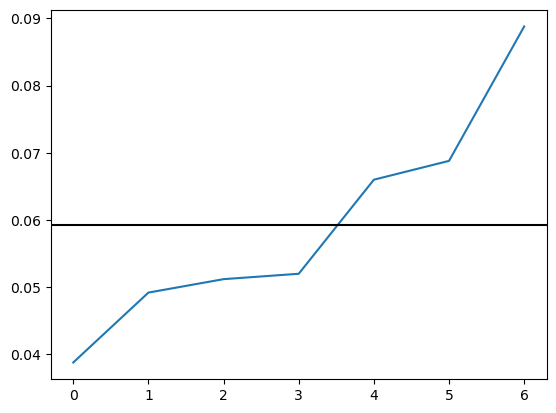

In [18]:
br.plot()

In [19]:
%%time
br.breed(7)

CPU times: user 11min 17s, sys: 14.8 s, total: 11min 32s
Wall time: 11min 14s


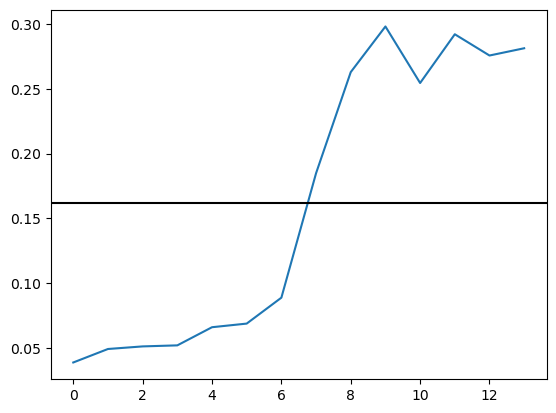

In [20]:
br.plot()

In [22]:
a = br.agents[1]

In [28]:
a

In [24]:
pickle.dump(a, open("agent_genetic_14_g.pickle", "wb"))

In [30]:
b = pickle.load(open("agent_genetic_14_g.pickle", "rb"))

In [31]:
b

In [46]:
# agent = Agent_hemilton_cycle()
agent = br.agents[38]
w = World()
w.game(agent)
w 

w.replay()

interactive(children=(IntSlider(value=250, description='step', max=500), Output(layout=Layout(height='450px'))…

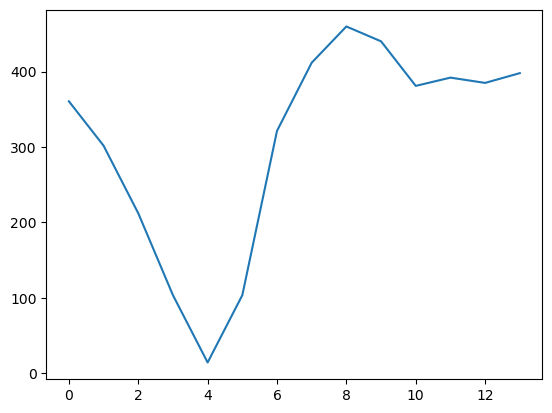

In [48]:
plt.plot(br.generation_steps)